In [97]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [98]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,NaN,-0.05889,NaN,0.02306,NaN,-0.37708,NaN,NaN,...,NaN,NaN,NaN,-0.46168,NaN,-0.34090,NaN,-0.54487,NaN,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,NaN,-0.02401,NaN,0.06531,NaN,-0.23255,NaN,NaN,...,NaN,NaN,NaN,-0.53206,NaN,-0.62197,NaN,-0.59573,NaN,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [99]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	36
float64		column 4	0
float64		column 5	104
float64		column 6	0
float64		column 7	104
float64		column 8	0
float64		column 9	138
float64		column 10	104
float64		column 11	104
float64		column 12	34
float64		column 13	102
float64		column 14	34
float64		column 15	138
float64		column 16	34
float64		column 17	104
float64		column 18	0
float64		column 19	138
float64		column 20	68
float64		column 21	104
float64		column 22	68
float64		column 23	138
float64		column 24	34
float64		column 25	138
float64		column 26	70
float64		column 27	104
float64		column 28	34
float64		column 29	138
float64		column 30	0
float64		column 31	138
float64		column 32	0
float64		column 33	104
float64		column 34	34


In [100]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,315.000000,351.000000,247.000000,351.000000,247.000000,351.000000,213.000000,247.000000,...,213.00000,281.000000,247.000000,317.000000,213.000000,351.000000,213.000000,351.000000,247.000000,317.000000
mean,0.891738,0.0,0.667623,0.044372,0.639586,0.115889,0.587064,0.119360,0.522034,0.147637,...,0.46814,-0.072183,0.549553,-0.065864,0.452649,-0.027907,0.411363,-0.003794,0.395675,0.018837
std,0.311155,0.0,0.462187,0.441435,0.471910,0.460810,0.455128,0.520750,0.485238,0.475751,...,0.53261,0.484468,0.487596,0.542107,0.527151,0.507974,0.535759,0.513574,0.513354,0.465921
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.502890,-0.064735,0.491315,-0.024795,0.308935,-0.054840,0.172930,-0.062535,...,0.15103,-0.290990,0.336340,-0.413070,0.158730,-0.236885,0.127270,-0.242595,0.000000,-0.168270
50%,1.000000,0.0,0.877720,0.016310,0.809200,0.022800,0.760010,0.014710,0.663640,0.012820,...,0.62025,-0.020990,0.684520,-0.017690,0.539520,0.000000,0.533890,0.000000,0.501690,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.975550,0.445675,0.935820,0.449475,...,0.91033,0.140790,0.964520,0.150880,0.903420,0.154075,0.853880,0.200120,0.837205,0.173910
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

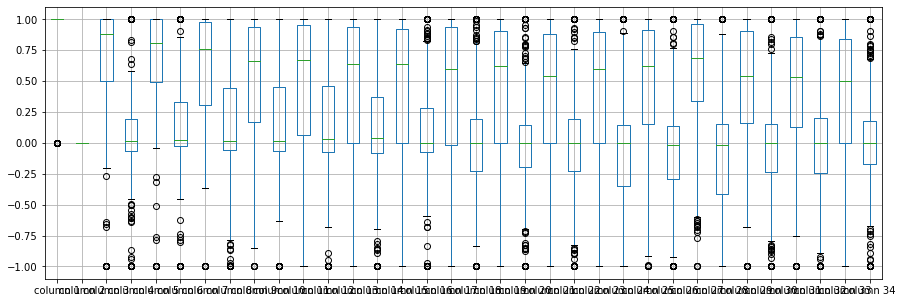

In [101]:
df.boxplot(return_type='axes', figsize=(15,5))

In [102]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.667623
column 4     0.044372
column 5     0.639586
column 6     0.115889
column 7     0.587064
column 8     0.119360
column 9     0.522034
column 10    0.147637
column 11    0.490130
column 12    0.150313
column 13    0.399388
column 14    0.090046
column 15    0.371519
column 16    0.073387
column 17    0.374027
column 18   -0.003617
column 19    0.393980
column 20   -0.010741
column 21    0.352501
column 22    0.017822
column 23    0.405970
column 24   -0.065135
column 25    0.468140
column 26   -0.072183
column 27    0.549553
column 28   -0.065864
column 29    0.452649
column 30   -0.027907
column 31    0.411363
column 32   -0.003794
column 33    0.395675
column 34    0.018837
dtype: float64

In [103]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.258472,-0.006529,0.083096,0.127606,0.122325,0.027079,0.174442,-0.044042,...,-0.001357,0.118686,-0.162855,0.010220,0.220540,-0.121415,0.129425,-0.100914,0.186129,0.014720
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.258472,NaN,1.000000,0.094833,0.500003,0.033103,0.373387,-0.030365,0.421075,0.069003,...,0.335506,-0.135600,0.159007,0.113212,0.225637,-0.018000,0.245324,-0.001499,0.274981,-0.001697
column 4,-0.006529,NaN,0.094833,1.000000,0.011338,-0.190308,-0.084447,0.255003,-0.354872,0.273095,...,-0.100145,-0.342689,-0.048733,0.006936,-0.107454,0.342301,-0.122341,-0.122788,-0.183636,0.052291
column 5,0.083096,NaN,0.500003,0.011338,1.000000,0.033382,0.537765,-0.019917,0.441676,-0.000811,...,0.301665,-0.102760,0.225144,0.259191,0.185802,-0.013100,0.397634,-0.033748,0.318929,-0.145715
column 6,0.127606,NaN,0.033103,-0.190308,0.033382,1.000000,0.001611,0.274747,-0.171455,0.179280,...,-0.196832,-0.041635,-0.239760,-0.092523,-0.022486,-0.158090,-0.068196,0.316802,0.061590,0.151279
column 7,0.122325,NaN,0.373387,-0.084447,0.537765,0.001611,1.000000,-0.128668,0.490786,-0.101015,...,0.257609,0.177522,0.155968,0.098194,0.213572,-0.135372,0.432117,-0.083711,0.486807,-0.055487
column 8,0.027079,NaN,-0.030365,0.255003,-0.019917,0.274747,-0.128668,1.000000,-0.453555,0.396990,...,-0.217573,-0.205146,-0.289885,0.048611,-0.175156,0.078585,-0.194765,0.152381,-0.239846,0.363394
column 9,0.174442,NaN,0.421075,-0.354872,0.441676,-0.171455,0.490786,-0.453555,1.000000,-0.227259,...,0.353032,0.133520,0.296878,0.168082,0.317076,-0.115752,0.333890,-0.165035,0.495475,-0.217193
column 10,-0.044042,NaN,0.069003,0.273095,-0.000811,0.179280,-0.101015,0.396990,-0.227259,1.000000,...,-0.397831,-0.127224,-0.255576,0.088760,-0.177126,0.099644,-0.098045,-0.088782,-0.235727,0.127954


In [104]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [118]:
imputer = md.Midas(layer_structure = [34,34+48,34+48+48,34+48+48+48,34+48+48+48+48,34+48+48+48,34+48+48,34+48,34], vae_layer = False, seed = 480)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 15.83824094136556
Epoch: 1 , loss: 15.760567755926223
Epoch: 2 , loss: 15.758880115690685
Epoch: 3 , loss: 15.74907484508696
Epoch: 4 , loss: 15.69788882845924
Epoch: 5 , loss: 15.690666970752535
Epoch: 6 , loss: 15.773782503037225
Epoch: 7 , loss: 15.534769012814476
Epoch: 8 , loss: 15.5059510185605
Epoch: 9 , loss: 15.433202062334333
Epoch: 10 , loss: 15.303323881966728
Epoch: 11 , loss: 15.27436315445673
Epoch: 12 , loss: 14.986825761340913
Epoch: 13 , loss: 14.242568197704497
Epoch: 14 , loss: 13.734045346577963
Epoch: 15 , loss: 13.723552068074545
Epoch: 16 , loss: 13.67155647277832
Epoch: 17 , loss: 13.537688346136184
Epoch: 18 , loss: 13.567723183404832
Epoch: 19 , loss: 13.490298498244513
Epoch: 20 , loss: 13.48313417888823
Epoch: 21 , loss: 13.414362952822732
Epoch: 22 , loss: 13.483739489600772
Epoch: 23 , loss: 13.354000727335611
Epoch: 24 , loss: 13.296437490554084
Epoch: 25 , loss: 13.2412

In [119]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [120]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.0
column 2     0.0
column 3     1.0
column 4     1.0
column 5     0.0
column 6     0.0
column 7     0.0
column 8     0.0
column 9    -1.0
column 10   -1.0
column 11    0.0
column 12    0.0
column 13    0.0
column 14    0.0
column 15   -1.0
column 16   -1.0
column 17   -1.0
column 18   -1.0
column 19   -1.0
column 20    1.0
column 21   -1.0
column 22    1.0
column 23    0.0
column 24    0.0
column 25    0.0
column 26    0.0
column 27    1.0
column 28   -1.0
column 29   -1.0
column 30    1.0
column 31   -1.0
column 32    1.0
column 33   -1.0
column 34    1.0
Name: 21, dtype: float64

In [121]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [122]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,-0.419637,0.0,-0.314171,0.0,-0.347824,0.0,-0.559412,0.080766,...,-0.216502,0.469308,0.088296,0.0,0.186064,0.0,-0.072963,0.0,0.182456,0.0
1,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
2,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,0,0,-0.342472,0.0,-0.282536,0.0,-0.355896,0.0,-0.260077,0.319396,...,0.437186,0.569541,0.437076,0.0,0.440021,0.0,0.445437,0.0,0.425770,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
347,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
348,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
349,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


Calculating NRMSE Value

In [123]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [124]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [125]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

29.503112554168823

In [126]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [127]:
NRMS=numerator/denominator
NRMS


0.430952959308549

In [128]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [129]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.575753,-0.05889,0.538259,0.02306,0.486156,-0.37708,0.440588,0.118366,...,0.351608,-0.042402,0.499076,-0.46168,0.398724,-0.34090,0.349707,-0.54487,0.368866,-0.45300
1,1,0,1.000000,-0.18829,0.930350,-0.36156,-0.108680,-0.93597,1.000000,-0.045490,...,-0.203320,-0.265690,-0.204680,-0.18401,-0.190400,-0.11593,-0.166260,-0.06288,-0.137380,-0.02447
2,1,0,1.000000,-0.03365,1.000000,0.00485,1.000000,-0.12062,0.889650,0.011980,...,0.575280,-0.402200,0.589840,-0.22145,0.431000,-0.17365,0.604360,-0.24180,0.560450,-0.38238
3,1,0,1.000000,-0.45161,1.000000,1.00000,0.712160,-1.00000,0.000000,0.000000,...,1.000000,0.906950,0.516130,1.00000,1.000000,-0.20099,0.256820,1.00000,-0.323820,1.00000
4,1,0,0.657528,-0.02401,0.658864,0.06531,0.565164,-0.23255,0.511443,0.155406,...,0.470046,-0.082039,0.569976,-0.53206,0.464331,-0.62197,0.388367,-0.59573,0.379690,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.835080,0.08298,0.737390,-0.14706,0.843490,-0.05567,0.904410,-0.046220,...,0.953780,-0.042020,0.834790,0.00123,1.000000,0.12815,0.866600,-0.10714,0.905460,-0.04307
347,1,0,0.951130,0.00419,0.951830,-0.02723,0.934380,-0.01920,0.945900,0.016060,...,0.945200,0.013610,0.935220,0.04925,0.931590,0.08168,0.940660,-0.00035,0.914830,0.04712
348,1,0,0.947010,-0.00034,0.932070,-0.03227,0.951770,-0.03431,0.955840,0.024460,...,0.939880,0.031930,0.924890,0.02542,0.921200,0.02242,0.924590,0.00442,0.926970,-0.00577
349,1,0,0.906080,-0.01657,0.981220,-0.01989,0.956910,-0.03646,0.857460,0.001100,...,0.910500,-0.020990,0.891470,-0.07760,0.829830,-0.17238,0.960220,-0.03757,0.874030,-0.16243


In [130]:
imputations[-1].to_excel("Ionosphere_AE_20(imp).xlsx", index=False, header=False)